In [114]:
using Plots
using Statistics

gr(legend=false)

Plots.GRBackend()

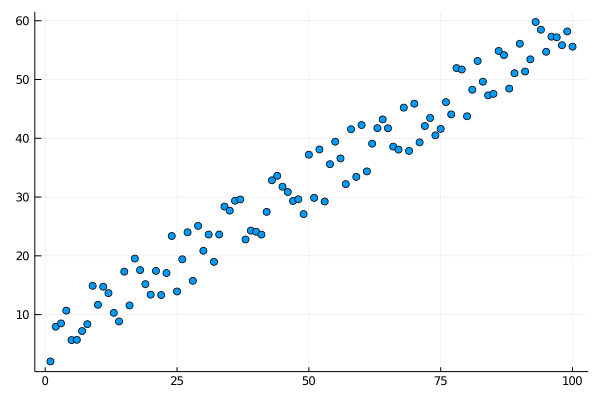

In [115]:
w = rand()
b = rand()

x = 1:100
y = (x .* w .+ b) .+ rand(100) * 10


W = rand()
B = rand()
epoch = 4000
lr = 0.00001

scatter(x, y)

In [116]:
function model(x)
  return W .* x .+ B
end

function cost(pred, target)
  return sum((pred .- target).^2)
end

function d_w(x, y)
  pred = model(x)
  return mean((pred .- y) .* x)
end

function d_b(x, y)
  pred = model(x)
  return mean((pred .- y))
end

d_b (generic function with 2 methods)

W:0.6017886325639462 B:0.8827428897573568
w:0.5361535513938862 b:0.5272521397895591


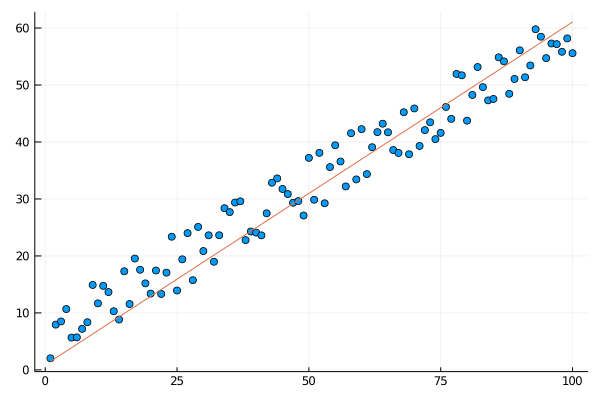

In [117]:
for i = 1:epoch
  w_tmp = W - lr * d_w(x, y)
  b_tmp = B - lr * d_b(x, y)
  W = w_tmp
  B = b_tmp
end

println("W:", W, " B:", B)
println("w:", w, " b:", b)

scatter(x, y)
plot!(x, x .* W .+ B)